# **Laboratorio 3**

Profesor: Joaquín Fontbona

Auxiliares: Bruno Hernández, Pablo Araya

Grupo: 7

Integrantes: Branco Paineman, Diego Dominguez, Sebastián Rojas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns 

## **Pregunta 1**

En esta pregunta, se modelará el ferromagnetismo en una placa metálica idealizada. Para ello, se toma $N\in\mathbb{N},$ y se considera que las moleculás se ubican en la grilla $\Lambda=\Lambda_{N}=\{-N,...,N\}^{2}\subset \mathbb{Z}^{2}.$ 


Además, cada molécula posee un *spin* (momento magnético), el cual tiene dos configuraciones posibles: hacia arriba y hacia abajo, lo que será representado con $1$ y $-1$ respectivamente. Así, para $N$ fijo, el conjunto de configuraciones posibles de las moléculas en la grilla es $\{-1,1\}^{\Lambda}=\{-1,1\}^{\Lambda_{N}}$, que será denotado por $E_{N}.$


Para $x\in E_{N}$ y $m\in\Lambda,$ se denotará por $x(m)\in\{-1,1\}$ al *spin*, según la configuración $x$, de la molécula ubicada en el sitio $m$ de la grilla.


Se define $E=\{x\in E_{N}:x(m)=1,\forall \in \partial\Lambda\}$ el espacio de configuraciones con *spin* fijo hacia arriba en el borde, donde $\partial\Lambda=(\Lambda_{N}\setminus\Lambda_{N-1})$, el cual será el espacio con el que se trabajará en este problema.


Además, la energía de una configuración $x\in E_{N}$ está dada por

$$H(x)=\sum_{m\sim m'}[x(m)-x(m')]^{2},$$ 

donde $m\sim m'$ indica que $m$ y $m'$ son vecinos (están a distancia 1) en la grilla (cada par $m,m'$ aparece sólo una vez en la sumatoria). 


Se considerará que la probabilidad de que el sistema esté en la configuración $x\in E$ es igual a $$\pi_{x}=\frac{e^{-\beta H(x)}}{Z(\beta)},$$ donde $\beta>0$ es un parámetro del modelo (es el inverso multiplicativo de la temperatura), y $Z(\beta):=\sum_{y\in E}e^{-\beta H(y)}$  es la constante de normalización. Este supuesto se condice con lo que ocurre en los sistemas físicos reales, pues mientras más cercana a $0$ sea la energía $H(x)$ de una configuración $x$ (lo que ocurre mientras más alineados estén los *spins* de moléculas en sitios cercanos), mayor será la probabilidad de que el sistema se encuentre en esa configuración.


Dado todo lo anterior, el objetivo es simular realizaciones que distribuyen según $\pi\in \mathcal{P}(E)$.

### Parte 1)

Se puede notar que $|\Lambda_{N}|=|{-N,...,N}|^{2}=(2N+1)^{2}$. Ahora, como los valores del borde de las grillas en $E$ están fijados en $1$, existe una función biyectiva entre $E$ y $E_{N-1}$, la cual a cada $x\in E$ le asocia $x'\in E_{N-1}$, donde $x'$ resulta de restringir $x$ a $(\Lambda\setminus\partial\Lambda)$, es decir, $x(m)=x'(m)$ $\forall m\in(\Lambda\setminus\partial\Lambda_{N}).$ 


Así, $|E|=|E_{N-1}|=|\{-1,1\}|^{|\Lambda_{N-1}|}=2^{(2N-1)^{2}}.$ Notamos que para calcular $\pi$ de forma explícita (y así samplearla con los métodos que vimos en laboratorios anteriores), es necesario calcular la constante $Z(\beta),$ la cual requiere que se evalúe la función $e^{-\beta H(y)}$ para todo $y\in E$, es decir, se necesitan $2^{(2N-1)^{2}}$ evaluaciones de la función $e^{-\beta H(\cdot)}.$ Para $N=10$, tenemos que $|E|=2^{361}\geq 4.69\cdot 10^{108},$ y se estimó que el tiempo que toma calcular $e^{0}$ es mayor a $3\cdot10^{-6}$ segundos, por lo tanto, el tiempo que toma calcular $Z(\beta)$ es mayor a $10^{103}$ segundos, lo que equivale a más de $10^{98}$ días.


Con lo anterior, se concluye que es impracticable calcular $\pi$ de manera explícita, incluso para un $N$ pequeño como $10$, por lo que es necesario ocupar un algoritmo tipo *Markov Chain Monte Carlo* para simular $\pi$, pues este método sólo necesita una versión proporcional de $\pi$ (es decir, no necesita el valor $Z(\beta)$).

In [3]:
import time
inicio = time.time()

for i in range(0,100):
  np.exp(0)

fin = time.time()
print((fin-inicio)/100)

3.5429000854492186e-06


### Parte 2)

Para utilizar el algoritmo de MCMC, se considera un grafo $G$ sobre $E$, en el cual $xy$ es una arista de $G$ si y sólo si $x$ e $y$ son distintos en exactamente un sitio, es decir, si $\exists m_{0}\in(\Lambda\setminus\partial\Lambda)$ tal que $x(m_{0})\neq y(m_{0})$ y $x(m)=y(m)$ $\forall m\neq m_{0}.$


Con el grafo construído, queda elegir la matriz de transición $R=(R_{xy})_{x,y\in E}$. Se analizarán las dos opciones estudiadas en clases, las cuales están dadas por el algoritmo de Metropolis y por el algoritmo de Gibbs. Para ambos casos, $R_{xy}$ es $0$ cuando $x$ e $y$ no son vecinos, por lo que se analizará el caso cuando sí lo son.


Así, para el algoritmo de Metropolis, tenemos que $R_{xy}=\frac{1}{deg(x)},$ con $deg(x)$ el cardinal de los vecinos de $x$. Dada la definición de las aristas en $G$, se puede notar que cada configuración $x$ tiene $|\Lambda\setminus\partial\Lambda|=|\Lambda_{N-1}|=(2N-1)^{2}$ vecinos, pues para cada $m_{0}\in\Lambda\setminus\partial\Lambda$, se puede cambiar el signo de $x(m_{0})$ y mantener el signo de los otros sitios, y así obtener un vecino de $x$, mientras que cada vecino de $x$ resulta (por definición) de cambiar exactamente el *spin* de un sitio $m_{0}\in\Lambda\setminus\partial\Lambda$, es decir, hay una biyección entre los vecinos de $x$ y $\Lambda\setminus\partial\Lambda.$ Así, cuando $x$ e $y$ son vecinos en $G$, $$R_{xy}=\frac{1}{(2N-1)^{2}},$$
y con ello, $$\frac{\pi_{y}R_{yx}}{\pi_{x}R_{xy}}=\frac{\pi_{y}(2N-1)^{2}}{\pi_{x}(2N-1)^{2}}=\frac{\pi_{y}}{\pi_{x}}=\frac{\frac{e^{-\beta H(y)}}{Z(\beta)}}{\frac{e^{-\beta H(x)}}{Z(\beta)}}=\frac{e^{-\beta H(y)}}{e^{-\beta H(x)}}.$$


Por otro lado, para el algoritmo de Gibbs, se tiene que $R_{xy}=\pi_{y}(\sum_{z\sim x}\pi_{z})^{-1}$ para $x\sim y$, y reemplazando por los valores de $\pi$ se tiene que $R_{xy}=e^{-\beta H(y)}(\sum_{z\sim x}e^{-\beta H(z)})^{-1}.$ Luego, queda que $$\frac{\pi_{y}R_{yx}}{\pi_{x}R_{xy}}=\frac{\pi_{y}}{\pi_{x}}\cdot\frac{R_{yx}}{R_{xy}}=\frac{e^{-\beta H(y)}}{e^{-\beta H(x)}}\cdot\frac{e^{-\beta H(x)}}{e^{-\beta H(y)}}\cdot\frac{\sum_{z\sim x}e^{-\beta H(z)}}{\sum_{w\sim y}e^{-\beta H(w)}}=\frac{\sum_{z\sim x}e^{-\beta H(z)}}{\sum_{w\sim y}e^{-\beta H(w)}}.$$


Así, se puede observar que es más conveniente usar el algoritmo Metropolis para escoger la matriz $R$, pues ambos métodos requieren calcular la función $e^{-\beta H(\cdot)}$, pero el de Gibbs necesita evaluar esta función $deg(x)+deg(y)=2(2N-1)^{2}$ veces, mientras que el de Metropolis sólo necesita evaluarla $2$ veces.

### Parte 3)

Con todo lo anterior, el algoritmo MCMC para este problema queda de la siguiente forma:

- Se generan $(V_{n})_{n\in\mathbb{N}}$ variables i.i.d. uniformes en $[0,1]$ y se toma una función de transición $f:[0,1]\times E\to E$ asociada a $R$.
- Se generan $(U_{n})_{n\geq1}$ variables i.i.d. uniformes en $[0,1]$, independientes de las $(V_{n})_{n\in\mathbb{N}}.$
- Se simula $X_{0}=Y_{0}$ según una ley inicial $\mu$ (utilizando $V_{0}$), y se toma $k=0$.
- Dado $X_{k}=x,$ se simula $Y_{k+1}=f(V_{k+1},x)=y$, y se considera $X_{k+1}=Y_{n+1}$ si $U_{k+1}\leq\frac{\pi_{y}Ryx}{\pi_{x}Rxy}=\frac{e^{-\beta H(y)}}{e^{-\beta H(x)}},$ o $X_{k+1}=X_{k}$ si $U_{k+1}>\frac{\pi_{y}Ryx}{\pi_{x}Rxy}=\frac{e^{-\beta H(y)}}{e^{-\beta H(x)}}.$
- Se actualiza $k$ por $k+1$ y se vuelve al punto anterior.



Se puede notar que $R_{xy}=\frac{e^{-\beta H(y)}}{e^{-\beta H(x)}}=e^{-\beta(H(y)-H(x))}=e^{-\beta\Delta H},$ con $\Delta H=H(y)-H(x).$ Notamos que si $y$ es vecino de $x$ en $G$, entonces sólo existe un $m_{0}=(i,j)$ tal que $x(m_{0})\neq y(m_{0}),$ es más, se debe tener que $y(m_{0})=-x(m_{0})$ y además $i,j\notin\{-N,N\}$ (pues $y$ debe estar en $E$). Luego, la sumatoria de cálculo de $H(x)$ y $H(y)$ hay exactamente 4 valores distintos, los que corresponden a $(i,j)\sim (i-1,j),(i,j)\sim (i+1,j),(i,j)\sim (i,j-1)$ y $(i,j)\sim (i,j+1).$ Así, 


$$\Delta H=\sum_{m\sim m'}[y(m)-y(m')]^{2}-\sum_{m\sim m'}[x(m)-x(m')]^{2}\\
=[x((i-1,j))+x((i,j))]^{2}-[x((i-1,j))-x((i,j))]^{2}+[x((i+1,j))+x((i,j))]^{2}-[x((i+1,j))-x((i,j))]^{2}+[x((i,j-1))+x((i,j))]^{2}-[x((i,j-1))-x((i,j))]^{2}+[x((i,j+1))+x((i,j))]^{2}-[x((i,j+1))-x((i,j))]^{2}\\ = 4[x((i-1,j))\cdot x((i,j))]+4[x((i+1,j))\cdot x((i,j))]+4[x((i,j-1))\cdot x((i,j))]+4[x((i,j+1))\cdot x((i,j))]\\=4\cdot x((i,j))[x((i-1,j))+x((i+1,j))+x((i,j-1))+x((i,j+1))],$$ 



donde en la segunda línea se factorizó según $(a^{2})-(b^{2})=(a-b)(a+b).$ Así, 

$$R_{xy}=e^{-4\beta\cdot x((i,j))[x((i-1,j))+x((i+1,j))+x((i,j-1))+x((i,j+1))]},$$

donde $(i,j)$ es el único punto tal que $x((i,j))\neq y((i,j)).$ 

Así, para implementar el algoritmo, se definió la función *delta_H(X,i,j)* que dada una configuración $X$ calcula $\Delta H= H(Y)-H(X)$, donde $Y$ es vecino de $X$ en $G$ y $Y((i,j))\neq X((i,j)).$

In [4]:
def delta_H(X,i,j):
    Y=X.copy()
    deltah=4*X[i,j]*(X[i-1,j]+X[i+1,j]+X[i,j-1]+X[i,j+1])
    return deltah

Además, se consideró que la ley inicial $\mu$ es tal que los ${x_{0}(m)}_{m\in \Lambda\setminus\partial\Lambda}$ son i.i.d. y distribuyen según $(2\cdot Bernoulli(p)-1)$, y $x_{0}(m)=1$ $\forall m\in\partial\Lambda.$ Para esto, se construyó la función *x0(N,p)* que hace exactamente lo planteado.



Con todo lo anterior, se implementó el método *Ising(N,beta,nf,p,plot)* donde $N$ es el valor que indica el tamaño de la grilla $\Lambda=\Lambda_{N}$ a considerar, $beta$ es el $\beta$ de la ley $\pi$, $nf$ es el número de pasos hasta el cual se simulará la cadena, $p$ es el parámetro de la ley inicial $\mu$, y $plot$ es un parámetro booleano.



El método *Ising* simula una configuración $x_{0}$ según $\mu$, luego simula el comportamiento de la cadena según el algoritmo detallado anteriormente (apoyándose en la función *delta_H* para calcular $e^{-\beta\Delta H}$) y retorna la configuración en el paso $nf$. Además, si $plot$ es $True$, grafica el estado de la cadena para los tiempos $0,nf$ y $k\lfloor nf/6 \rfloor$ con $k=1,...,6.$ Estos gráficos tienen desplazados su origen: el $(0,0)$ del gráfico es el $(-N,N)$ de la grilla $\Lambda.$



Para simplificar, el método no genera las variables $(V_{n})_{n\in\mathbb{N}},$ sino que elige un $(i,j)$ uniformemente en $\Lambda\setminus\partial\Lambda$ (eligiendo uniformemente la coordenada $i$ y la coordenada $j$). Además, no genera la cadena $Y$ mencionada en la descripción del algoritmo, sino que automáticamente toma $X_{n+1}=X_{n}$ y lo actualiza cambiando el signo de $X_{n+1}((i,j))$ si es que se cumple que $U_{n+1}\leq e^{-\beta\Delta H}.$ Por último, tampoco guarda cada estado de la cadena $X$, sino que considera una variable *X* que va actualizando en cada paso, para así ahorrar memoria.

In [34]:
def x0(N,p):
    x=np.ones((2*N+1,2*N+1))
    x[1:2*N,1:2*N]=2*np.random.binomial(1,p,size=(2*N-1,2*N-1))-1
    return x

def Ising(N,beta,nf,p,plot=False):
    X=x0(N,p)
    X_plot=np.zeros(8,dtype=object)
    X_plot[0]=X.copy()
    indice_plot=np.zeros(8)
    delta=int(nf/6)
    for n in range(1,nf+1):
        i=np.random.randint(1,2*N)
        j=np.random.randint(1,2*N)  
        if np.random.uniform()<=np.exp(-beta*(delta_H(X,i,j))):
            X[i,j]=-X[i,j]
        if n/delta==int(n/delta):
            X_plot[int(n/delta)]=X.copy()
            indice_plot[int(n/delta)]=n
    X_plot[-1]=X.copy()
    indice_plot[-1]=nf
    if plot:
        fig, axs = plt.subplots(2, 4,figsize=[20,10])
        im0=axs[0, 0].imshow(X_plot[0])
        axs[0,0].set_title('Configuración de la grilla en \n'+str(indice_plot[0])+' pasos, con p='+str(p)+'.')
        plt.colorbar(im0,ax=axs[0,0])

        im1=axs[0, 1].imshow(X_plot[1])
        axs[0,1].set_title('Configuración de la grilla en \n'+str(indice_plot[1])+' pasos, con p='+str(p)+'.')
        plt.colorbar(im1,ax=axs[0,1])

        im2=axs[0, 2].imshow(X_plot[2])
        axs[0,2].set_title('Configuración de la grilla en \n'+str(indice_plot[2])+' pasos, con p='+str(p)+'.')
        plt.colorbar(im1,ax=axs[0,2])

        im3=axs[0, 3].imshow(X_plot[3])
        axs[0,3].set_title('Configuración de la grilla en \n'+str(indice_plot[3])+' pasos, con p='+str(p)+'.')
        plt.colorbar(im1,ax=axs[0,3])

        im4=axs[1, 0].imshow(X_plot[4])
        axs[1,0].set_title('Configuración de la grilla en \n'+str(indice_plot[4])+' pasos, con p='+str(p)+'.')
        plt.colorbar(im1,ax=axs[1,0])

        im5=axs[1, 1].imshow(X_plot[5])
        axs[1,1].set_title('Configuración de la grilla en \n'+str(indice_plot[5])+' pasos, con p='+str(p)+'.')
        plt.colorbar(im1,ax=axs[1,1])

        im6=axs[1, 2].imshow(X_plot[6])
        axs[1,2].set_title('Configuración de la grilla en \n'+str(indice_plot[6])+' pasos, con p='+str(p)+'.')
        plt.colorbar(im1,ax=axs[1,2])

        im7=axs[1, 3].imshow(X_plot[7])
        axs[1,3].set_title('Configuración de la grilla en \n'+str(indice_plot[7])+' pasos, con p='+str(p)+'.')
        plt.colorbar(im1,ax=axs[1,3])


    return X

Se utilizó el método con $N=100$, $nf=100000$ y $\beta=0.2$ para evidenciar la influencia del parámetro $p>0.5$ en el comportamiento de la cadena. Así, se tomó $p_{1}=0.6$ y $p_{2}=0.8.$

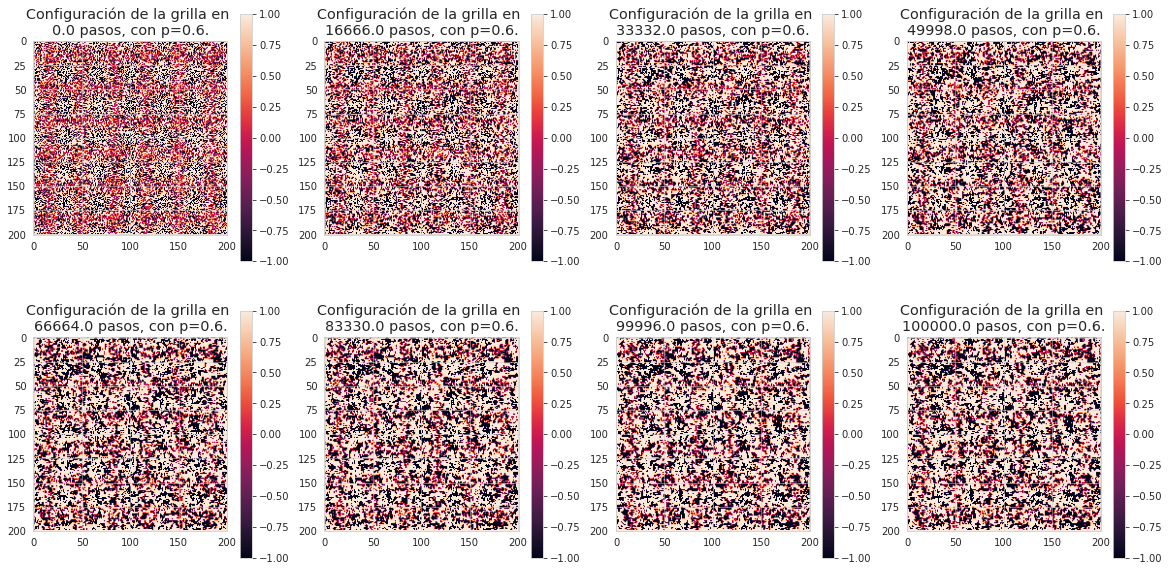

In [35]:
N=100
beta=0.2
nf=100000
p1=0.6
p2=0.8
X_p1=Ising(N,beta,nf,p1,True)

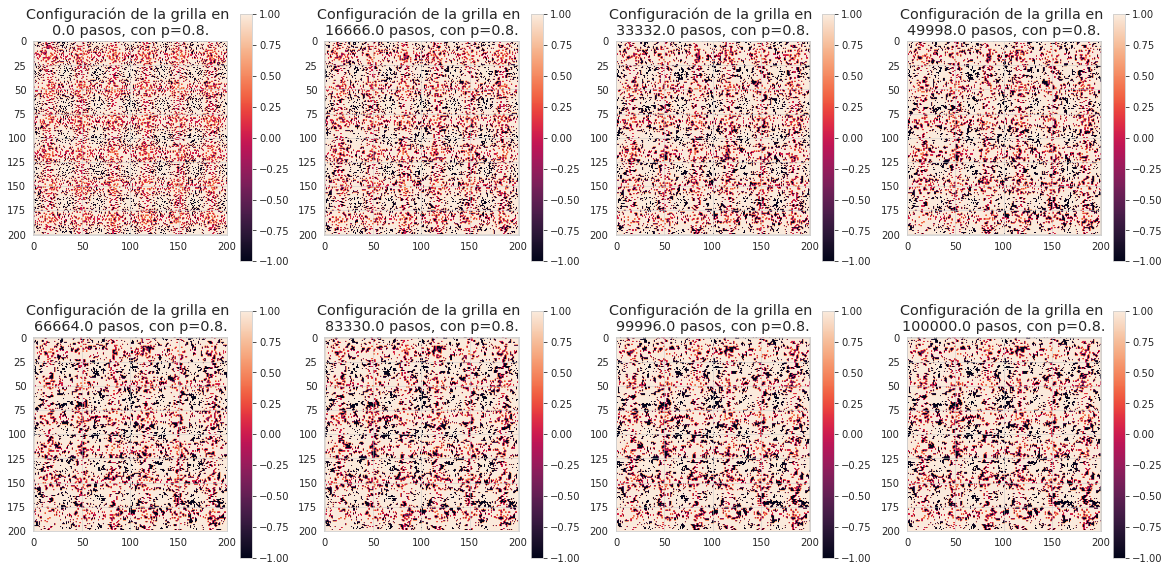

In [36]:
X_p2=Ising(N,beta,nf,p2,True)

Para obtener una mejor comparación, se corrió el algoritmo con un $20\beta$ como parámetro.

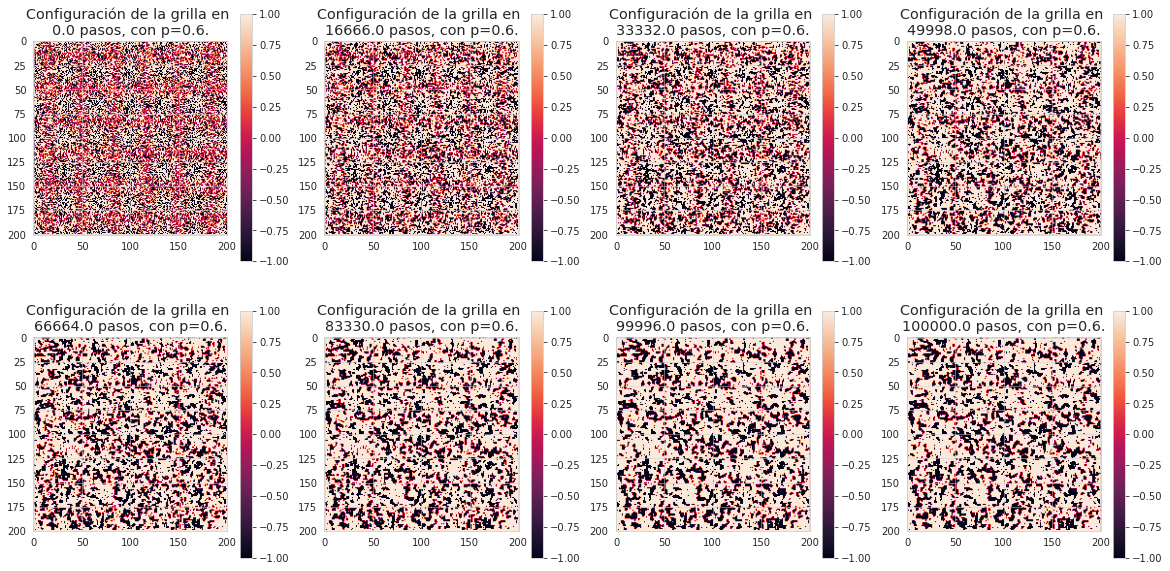

In [37]:
X2_p1=Ising(N,20*beta,nf,p1,True)

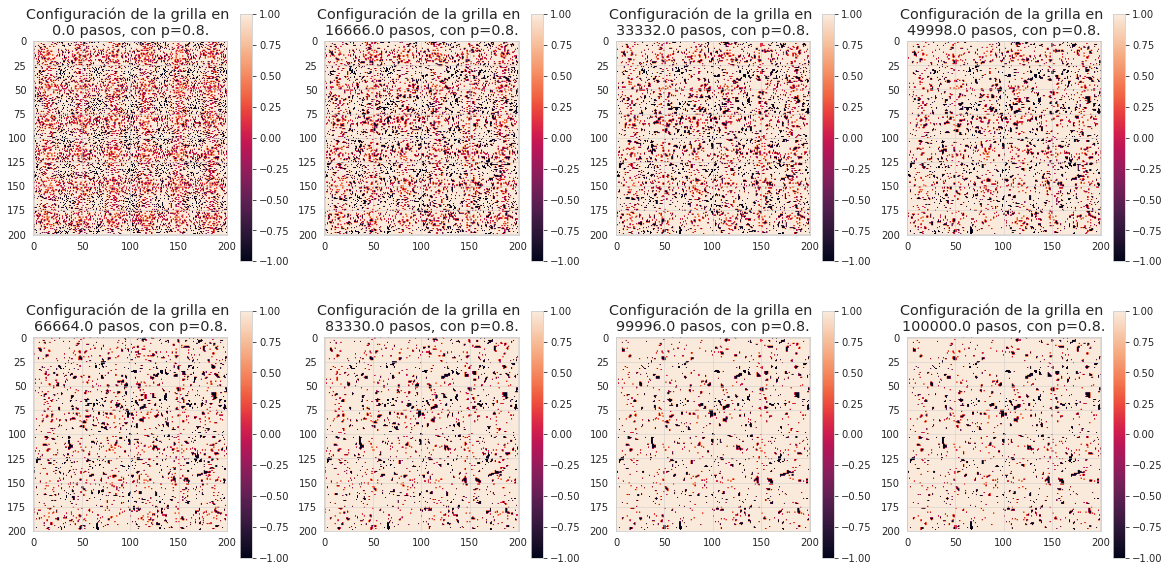

In [38]:
X2_p2=Ising(N,20*beta,nf,p2,True)

Se puede observar que el $p$ influye claramente en la configuración inicial de los *spins* de la grilla, notando que mientras más grande es su valor, mayor concentración de *spins* iguales a 1 se pueden encontrar.



Sin embargo, la evolución de la cadena parece no depender del $p$ tan fuertemente, pues se puede ver que para el primer $\beta$ $(0.2)$, indepedientemente del $p$, la cadena tiende a "ganar" sitios con *spin* negativo, mientras mientras que para el segundo $\beta$ $(4)$ la cadena para los dos valores de $p$ tiende a tener cada vez más sitios con *spin* positivo.  



Así, podemos concluir que el $p$ influye en la configuración inicial, pero no en la evolución de la cadena en sí. Eso sí, para un número de pasos $nf$ si se ve la influencia de $p$, pues la configuración de la grilla en ese tiempo depende de la configuración inicial. En efecto, para el primer $\beta$, si bien ambas cadenas tienden a tener cada vez más *spins* negativos, al instante $nf=100000$, la cadena con menor $p$ tiene muchos más de estos *spins* que la cadena con $p$ mayor, debido a que la configuración inicial de la cadena con $p$ menor tiene muchos más sitios con *spin* igual a -1. Por otro lado, para el segundo $\beta$ ambas cadenas van teniendo cada vez más *spins* positivos, pero para el paso $nf$ ya indicado, la cadena con mayor $p$ concentra más *spins* iguales a 1, debido a que en su configuración inicial también lo hace.

### Parte 4)

Para esta parte, se fijó $p=0.75$, $N=100$ y $nf=100000$, con el objetivo de analizar la incidencia de $\beta$ en el comportamiento de la cadena. Así, se consideraron dos betas: $\beta_{1}=0.1$ y $\beta_{2}=6,$ y luego se aplicó el método *Ising* para ambos valores. 

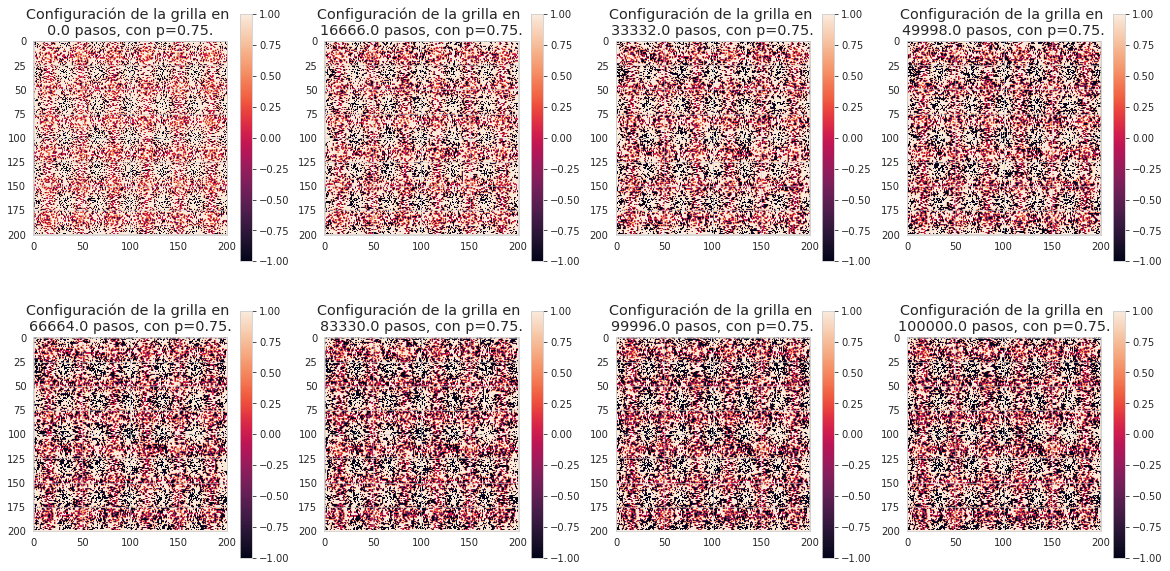

In [39]:
beta1=0.1
beta2=6
p=0.75
X_beta1=Ising(N,beta1,nf,p,True)

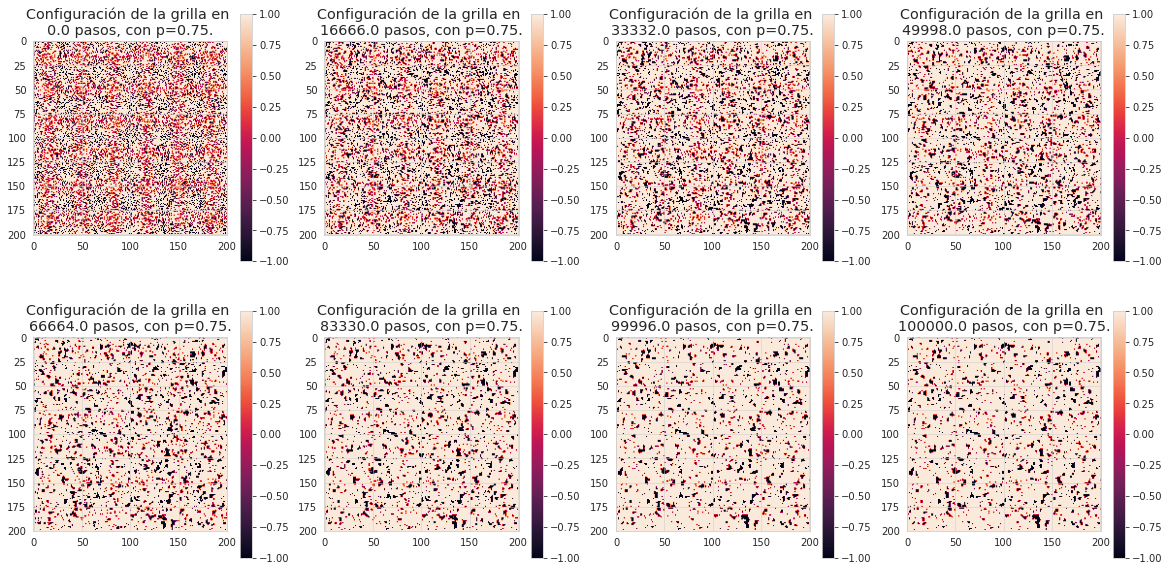

In [40]:
X_beta2=Ising(N,beta2,nf,p,True)

Con esto, se puede observar que los estados iniciales de ambas cadenas son similares (en términos de la cantidad de cada uno de los *spins*), pues provienen de la misma distribución (ya que $p$ está fijo), sin embargo, a medida que la cadena avanza más pasos, se vuelven cada vez más diferentes. 



En particular, se puede observar que para el $\beta$ pequeño, se tiende a equilibrar la cantidad de *spins* de cada signo (parte, muy probablemente, con mayor cantidad de *spins* 1 pues $p>0.5$), mientras que para el $\beta$ más grande, la mayoría de los sitios tiende a quedar con *spin* igual a 1.



Lo anterior se debe a que, mientras más grande es $\beta$, más importancia se le dará a la energía en la función $e^{-\beta H(x)},$ generando que sean mucho más probables las transiciones hacia configuraciones con menor energía (más *spins* alineados) que a las con mayor, y como la configuración inicial tiene mayor a cantidad de sitios con *spin* positivos, se hará más probable ir pasando a configuraciones con más *spins* positivos. Por otro lado, mientras más pequeño es $\beta,$ el valor de $\beta H(x)$ tenderá a $0$ para cualquier configuración, lo que lleva a que la energía pierda importancia a la hora de las transiciones, lo que genera que la cantidad de *spins* positivos y negativos tienda a emparejarse.

### Parte 5)

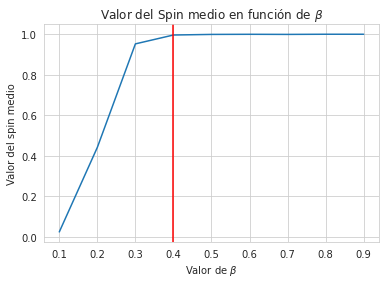

In [10]:
p=0.75
nf_grande=1000000
s=np.array([])
betas=np.arange(0.1,1,0.1)
N_=100
for b in betas:
    X_beta=Ising(N_,b,nf_grande,p)
    X_beta=np.reshape(X_beta,((2*N_+1)**2,))
    s=np.append(s,sum(X_beta)/len(X_beta))

sns.set_style('whitegrid')
plt.plot(betas,s)
plt.title(r'Valor del Spin medio en función de $\beta$')
plt.xlabel(r'Valor de $\beta$')
plt.ylabel(r'Valor del spin medio')
plt.axvline(x=0.4,color='r')
plt.show()

In [11]:
pd.DataFrame({'Beta':betas, 'Spin Medio': s})

Beta  Spin Medio
0   0.1    0.025074
1   0.2    0.441994
2   0.3    0.952476
3   0.4    0.996188
4   0.5    0.999158
5   0.6    0.999752
6   0.7    0.999208
7   0.8    1.000000
8   0.9    1.000000

En primer lugar se establece pasos del orden de un millón, con el fin de que el algoritmo tenga tiempo para acercarse a la distribución $\pi$. Luego se simula la cadena para distintos valores de $\beta \in [0,1]$, obteniendo de esta manera distintos valores del spin medio. 

De los resultados obtenido se observa que hay un salto considerable del valor del spin medio para $\beta \in [0.2,0.3]$.
También se observa que alrededor de $0.4$, el valor del spin medio comienza a converger a 1, esto significa que las configuraicones obtenidas tendrán el spin hacia arriba en la gran mayoría de los sitios para betas superiores a $0.4$.

Por lo tanto, del gráfico se puede estimar visualmente que el valor del beta crítico es aproximadamente $\beta _ {C} = 0.40$

### Parte 6)

In [12]:
betas_precision=np.arange(0.3,0.51,0.04)
nf_grande_2=1500000
s2=np.array([])
for b in betas_precision:
    X_beta=Ising(N_,b,nf_grande_2,p)
    X_beta=np.reshape(X_beta,((2*N_+1)**2,))
    s2=np.append(s2,sum(X_beta)/len(X_beta))

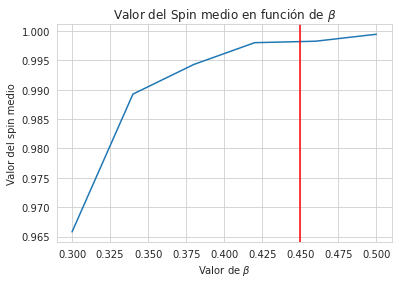

In [13]:
sns.set_style('whitegrid')
plt.plot(betas_precision,s2)
plt.title(r'Valor del Spin medio en función de $\beta$')
plt.xlabel(r'Valor de $\beta$')
plt.ylabel(r'Valor del spin medio')
plt.axvline(x=0.45,color='r')
plt.show()

Al repetir el proceso anterior para valores de betas centrados en el intervalo $[0.3,0.5]$, se observa que el valor del spin medio es muy cercano a 1 a partir de 0.45, por lo tanto, nuestro nuevo valor crítico será $\beta _{C} = 0.45$

Por definición, $\beta > 0$ es la temperatura inversa del sistema. Para simulaciones de Monte Carlo, el valor crítico de Beta es calculado de la siguiente forma$^{[1]}$: $\beta _{C} = \frac{ln(1+\sqrt{2})}{2} \approx 0.44068 $  

Por lo tanto, se concluye que la construcción de nuestro algoritmo es muy eficaz pues entrega una buena estimación del beta crítico. 

**Referencias:** 
1.  C. Alexandrou, A. Athenodorou, C. Chrysostomou and S. Paul (2020). *The critical temperature of the 2D-Ising model through deep learning autoencoders*. The European Physical Journal B, **pp. 3**. Recuperado de: https://d-nb.info/1225346274/34


## **Pregunta 2**

Dado un conjunto de N-1 ciudades en el cuadrado $[0,1]^{2}$ y $E=\left\{\sigma \in S_{N}:\sigma(0)=0  \right\}$

Se desea construir un algoritmo estocástico con el objetivo de minimizar la función de distancia total:
$$\omega(\sigma)=\sum_{i=0}^{N-1}d(\sigma(i),\sigma(i+1)$$

Donde $d$ es la distancia euclidiana entre las ciudades y $\sigma(N)=0$.

#### Parte 1)
Se debe crear una funcion de parametro N que contruya, N ciudades y una matriz $D=(D)_{i,j=0}^{N-1}$ donde $D_{i,j}$ es la distancia entre la ciudad $i$ y la ciudad $j$  

In [14]:
def GDC(N):
    ciudades=np.random.uniform(0,1,size=(N,2))
    D=np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if j>i:
                D[i][j]=np.linalg.norm(ciudades[i]-ciudades[j])
    D=D+D.transpose()
    return D,ciudades
            
            
            
        

### Parte 2)
 Programe una función que dado un camino que recorre las N ciudades, en el orden dado por $\sigma$ y graficar.

In [15]:
def G_C(camino,ciudades):
    plt.style.use("bmh")
    fig, ax = plt.subplots()
    x=[]
    y=[]
    for indices in camino:
        x.append(ciudades[indices][0])
        y.append(ciudades[indices][1])
        #print(ciudades[indices][0],ciudades[indices][1])
    ax.grid(True)
    for i, label in enumerate(camino):
        plt.annotate(label, (x[i], y[i]))

    ax.plot(x,y,marker = 'o')
    plt.title(r'Recorrido en orden $\sigma$ para'+' '+str(len(ciudades))+ ' ciudades')
    plt.xlabel('Posicion de la ciudad en x')
    plt.ylabel('Posicion de la ciudad en y')
    fig.show()

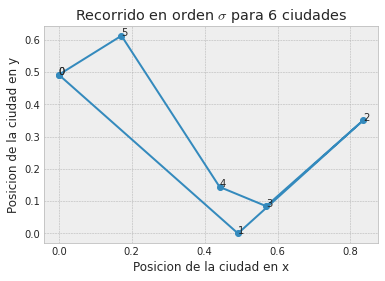

In [16]:
d1,c=GDC(6)
G_C([0,1,2,3,4,5,0],d1)

### Parte 3)

Se define $osc_K  (w) = max\{w(\tau)-w(\sigma): \tau \sim \sigma \}$. Se nos pide buscar una cota superior para $osc_K (w)$ para cada N, y que sea independiente de la posición de las ciudades.

Notemos que la posición de cualquiers ciudad se encuentra en $[0,1]^2$, por lo que la máxima distancia posible entre dos ciudades se consigue cuando se ubican en puntos extremos opuestos, por ejemplo, que la ciudad 1 este en la coordenada (0,0) y la ciudad 2 este en (1,1). 

Luego la distancia entre ambas es $\sqrt{(1-0)^2 + (1-0)^2} = \sqrt{2}$. Entonces se puede concluir que $\forall k,j \in \text{ciudades}:= \{ 1, ... , N \}$, $d(k, j) \leq \sqrt{2} $

Ademas dado que $\tau \sim \sigma$ , $\tau=\tau(0)\dots \tau(j) \dots \tau(k) \dots\tau(0) $ y $\sigma=\tau(0)\dots \tau(k) \dots \tau(j) \dots\tau(0) $, donde la permutacion es entre las ciudad $j$ y $k$, de esta forma $\omega(\tau)-\omega(\sigma) \leq d(\tau(j-1),\tau(j))+d(\tau(j),\tau(j+1))+d(\tau(k-1),\tau(k))+d(\tau(k),\tau(k+1))-d(\tau(j-1),\tau(k))-d(\tau(k),\tau(j+1))-d(\tau(k-1),\tau(j))-d(\tau(j),\tau(k+1))\leq 4\sqrt{2}$ dado que podemos acotar por los valores positivos y cada una de las distancias es menor a la diagonal del cuadrado, tomando maximo se concluye la cota pedida.

### Parte 4)

Considere una sucesión de temperaturas inversas $\beta_{n}=\frac{1}{c}\ln(n+e)$ con $C>(N-2)\text{Osc}_{K}(\omega)$ y a partir de una cadena de markov $(X_{n})$ no homogénea tal que , en el tiempo n,Su matriz de transición esta dada por la cadena $(X_{k}^{\beta})$ vista en clases.

La siguiente funcion tiene como objetivo calcular la distancia total de un recorrido $\sigma \in E$

In [17]:
def W_f(tau,D):
    sum=0 
    for i in range(len(tau)-1):
        sum+=D[tau[i]][tau[i+1]] 
    return sum

El siguiente metodo calcula n pasos de la cadena de markov antes descrita, ademas retorna el ultimo camino encontrado y el valor de $\omega$ para ese recorrido.

In [18]:
# array, matriz, str, int, bool --> int, plot
# La función método recibe: sigma (un camino a recorrer), D (matriz de distancias), 
# un string que determina la funcion bn a usar, n como el número de pasos, un valor booleano para determinar si se gráfica o no. 
def metodo(sigma,D,funcion,n,grafica=False):
    N=len(sigma)-1
    C=N*4*np.sqrt(2)  
    X=np.empty(n+1,dtype=object)             
    X[0]=sigma  
    U=np.random.uniform(0,1,n) 
    p1=0
    p2=0
    x=[]
    j=[]
    log = lambda j : (1/C)*np.log((j+1)+np.exp(1))
    exp = lambda j : (1/C)*np.exp((j+1)+np.exp(1))
    lin = lambda j : (1/C)*((j+1)+np.exp(1))
    cua = lambda j : (1/C)*((j+1)+np.exp(1))**2
    nln = lambda j : (1/C)*(j+1)*np.log((j+1)+np.exp(1))
    
    for i in range(n):
        tau=X[i].copy()
        n1=np.random.randint(1,N)  
        n2=np.random.randint(1,N)         
        while n2==n1: 
            n2=np.random.randint(1,N)  
        p1=tau[n1]
        p2=tau[n2]
        tau[n1]=p2
        tau[n2]=p1        
        Bn = {'log': log(i), 'exp': exp(i), 'lin': lin(i), 'cua': cua(i), 'nln': nln(i)} #Funciones bn
        bn=Bn[funcion]
        ex= np.exp(-bn*(W_f(tau,D)-W_f(X[i],D)))
        if U[i]<=min(ex,1):
            X[i+1]=tau 
        else:
            X[i+1]=X[i]
        if grafica:
            if i==0:
                x.append(W_f(X[0],D))
                j.append(i)
            x.append(W_f(X[i+1],D))
            j.append(i+1)
            
    titulos={'log': 'logarítmico','exp': 'exponencial','cua': 'cuadrático','lin': 'lineal','nln': 'n*log(n)'}
    plt.figure(figsize=[10,5])
    sns.set_style('whitegrid')
    plt.plot(j,x,color='dodgerblue', label='Valor de w($\sigma$)')
    plt.xlabel('N° de pasos')
    plt.ylabel('Distancias recorridas dado un camino')
    plt.title(r'Valor de w($\sigma$) en función de $\beta_{n}$ con crecimiento '+str(titulos[funcion]))
    plt.legend()

    plt.show()

    return X[-1],x

### Parte 5)

Considerando $N=20$ ciudades, se debe encontrar un mínimo global aproximado (Dado que la cadena converge en probabilidad a una uniforme sobre el conjunto de mínimos globales).Además se debe probar con diferentes formas de $\beta_{n}$, graficar el comportamiento de $\omega$ sobre los tiempos de la cadena y caminos representativos.

In [19]:
np.random.seed(0)
sigma=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,0]
D,C=GDC(20)
n=10000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning:

overflow encountered in exp



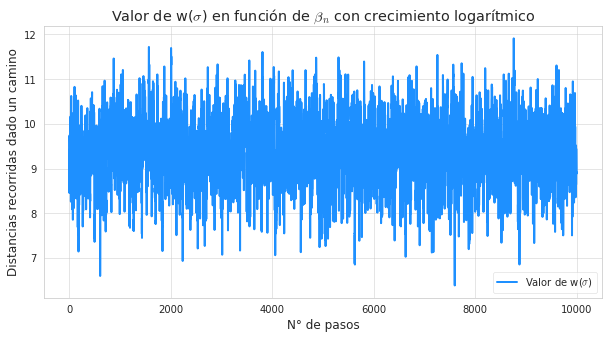

In [20]:
#Funcion bn=(1/C)*log((n+1)+e)
X1,x1=metodo(sigma,D,'log',n,True)

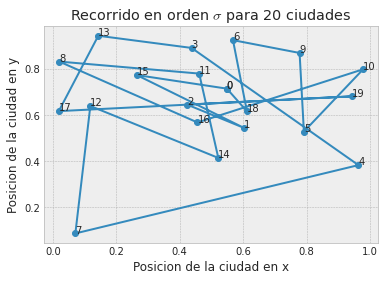

In [21]:
G_C(X1,C)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning:

overflow encountered in exp



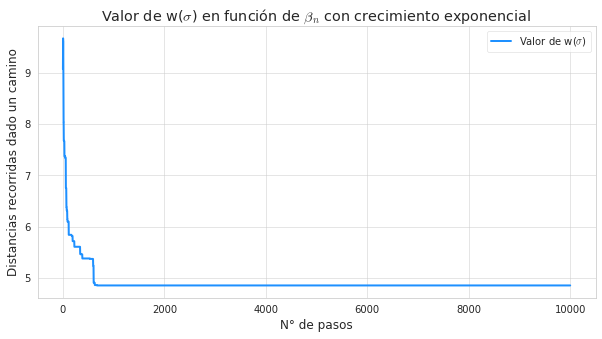

In [22]:
##Funcion bn=(1/C)*exp((n+1)+e)
X2,x2=metodo(sigma,D,'exp',n,True)

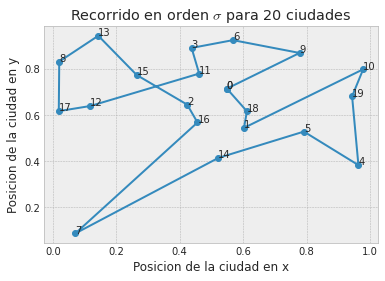

In [23]:
G_C(X2,C)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning:

overflow encountered in exp



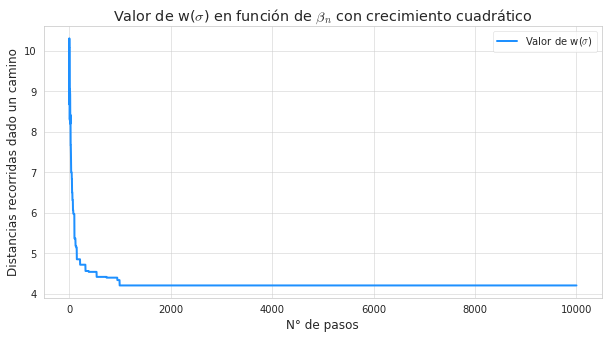

In [24]:
##Funcion bn=(1/C)*(n+1)*((n+1)+e)^2
X3,x3=metodo(sigma,D,'cua',n,True)

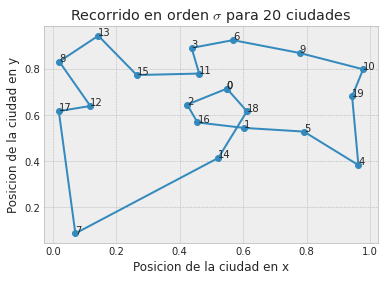

In [25]:
G_C(X3,C)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning:

overflow encountered in exp



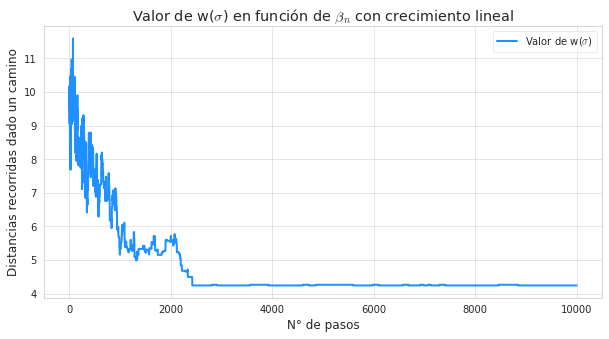

In [26]:
#Funcion bn=(1/C)*(n+1)*((n+1)+e)
X4,x4=metodo(sigma,D,'lin',n,True)

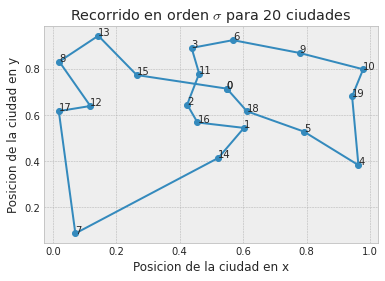

In [27]:
G_C(X4,C)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning:

overflow encountered in exp



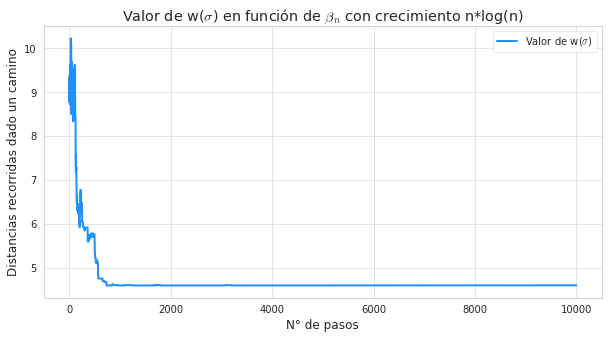

In [28]:
#Funcion bn=(1/C)*(n+1)*log((n+1)+e)
X5,x5=metodo(sigma,D,'nln',n,True)

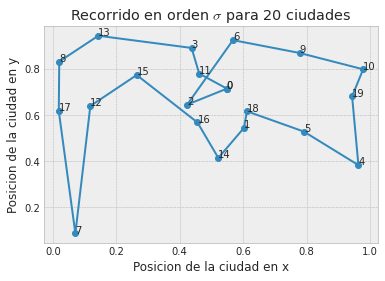

In [29]:
G_C(X5,C)

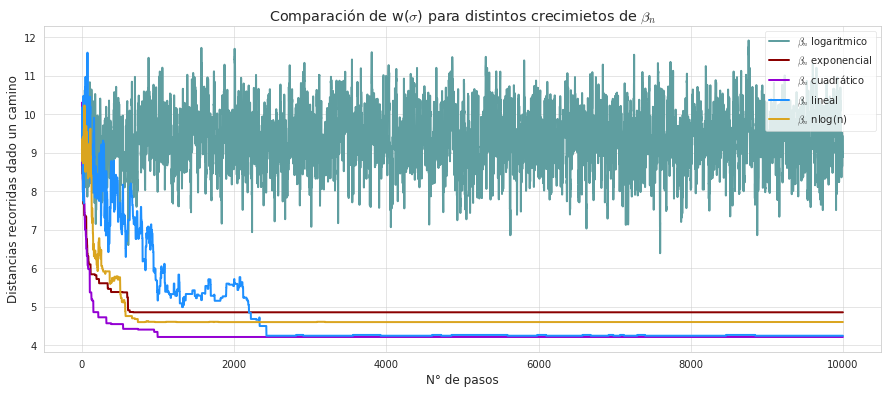

In [30]:
plt.figure(figsize=[15,6])
sns.set_style('whitegrid')
j=np.arange(n+1)
plt.plot(j,x1,color='cadetblue', label=r'$\beta_{n} $ logaritmico')
plt.plot(j,x2,color='darkred', label=r'$\beta_{n} $ exponencial')
plt.plot(j,x3,color='darkviolet', label=r'$\beta_{n} $ cuadrático')
plt.plot(j,x4,color='dodgerblue', label=r'$\beta_{n} $ lineal')
plt.plot(j,x5,color='goldenrod', label=r'$\beta_{n} $ nlog(n)')
plt.xlabel('N° de pasos')
plt.ylabel('Distancias recorridas dado un camino')
plt.title(r'Comparación de w($\sigma$) para distintos crecimietos de $\beta_{n}$')
plt.legend(loc='upper right')

In [31]:
pd.DataFrame({'Crecimiento de \u03B2_n':['Logarítmico','Exponencial','Cuadrático','Lineal','n*log(n)'], 'Mínimo de w(\u03C3)': [x1[-1],x2[-1],x3[-1],x4[-1],x5[-1]]})

Crecimiento de β_n  Mínimo de w(σ)
0        Logarítmico        8.903067
1        Exponencial        4.851143
2         Cuadrático        4.209837
3             Lineal        4.242152
4           n*log(n)        4.598605

### Conclusiones:

A partir de las distintas sucesiones $\beta_{n}$, los graficos y caminos encontrados, es posible observar  que tanto las opciones lineales y cuadraticas poseen un comportamiento adecuado para el fin del problema, es decir, encuentran un aproximado de un minimo global, en particular dado el camino encontrado por el algoritmo en el caso cuadratico, se observa que este puede mejorar (en el sentido de la distancia total) dado que existe un entrecruzamiento de dos aristas (intercambiando 16,1 por 16,14 y 18,14 por 18,1) de esta forma se puede observar el comportamiento de minimo global aproximado. 